In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

#test1
#시간 column을 텍스트 형태로 HH:MM:SS 형태로 받음

file_path = "${PlayTennis1.csv 파일 경로}"
datas = pd.read_csv(file_path)

print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Mon  14:23:34   no
1      sunny   hot     high   True  Sun  16:17:54   no
2   overcast   hot     high  False  Thu  20:09:11  yes
3      rainy  mild     high  False  Fri  12:45:42  yes
4      rainy  cool   normal  False  Sat  10:22:45  yes
5      rainy  cool   normal   True  Sun  11:03:12   no
6   overcast  cool   normal   True  Wed  19:25:32  yes
7      sunny  mild     high  False  Tue  18:03:21   no
8      sunny  cool   normal  False  Fri  18:50:26  yes
9      rainy  mild   normal  False  Sat   9:02:41  yes
10     sunny  mild   normal   True  Mon  21:33:10  yes
11  overcast  mild     high   True  Tue  20:27:30  yes
12  overcast   hot   normal  False  Thu  16:22:04  yes
13     rainy  mild     high   True  Fri  15:52:16   no


In [5]:
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    1     3     0
1         2     1         0      1    3     5     0
2         0     1         0      0    4    10     1
3         1     2         0      0    0     2     1
4         1     0         1      0    2     0     1
5         1     0         1      1    3     1     0
6         0     0         1      1    6     9     1
7         2     2         0      0    5     7     0
8         2     0         1      0    0     8     1
9         1     2         1      0    2    13     1
10        2     2         1      1    1    12     1
11        0     2         0      1    5    11     1
12        0     1         1      0    4     6     1
13        1     2         0      1    0     4     0


In [6]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    1     3
1         2     1         0      1    3     5
2         0     1         0      0    4    10
3         1     2         0      0    0     2
4         1     0         1      0    2     0
5         1     0         1      1    3     1
6         0     0         1      1    6     9
7         2     2         0      0    5     7
8         2     0         1      0    0     8
9         1     2         1      0    2    13
10        2     2         1      1    1    12
11        0     2         0      1    5    11
12        0     1         1      0    4     6
13        1     2         0      1    0     4

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [7]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

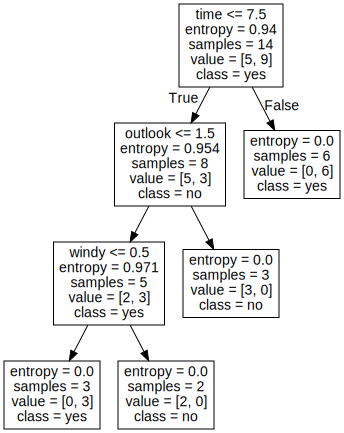

In [8]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [9]:
predict_result = decision_tree.predict(x_data)

print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [10]:
#test2
#시간을 hours로만 받음(분/초는 생략)

file_path = "${PlayTennis2.csv 파일 경로}"
datas = pd.read_csv(file_path)
print(datas)

     outlook  temp humidity  windy  day  hours play
0      sunny   hot     high  False  Mon     14   no
1      sunny   hot     high   True  Sun     16   no
2   overcast   hot     high  False  Thu     20  yes
3      rainy  mild     high  False  Fri     12  yes
4      rainy  cool   normal  False  Sat     10  yes
5      rainy  cool   normal   True  Sun      6   no
6   overcast  cool   normal   True  Wed     19  yes
7      sunny  mild     high  False  Tue      2   no
8      sunny  cool   normal  False  Fri     18  yes
9      rainy  mild   normal  False  Sat      9  yes
10     sunny  mild   normal   True  Mon     21  yes
11  overcast  mild     high   True  Tue     20  yes
12  overcast   hot   normal  False  Thu     16  yes
13     rainy  mild     high   True  Fri     15   no


In [11]:
label_encoder = LabelEncoder()

#정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['hours'] = label_encoder.fit_transform(datas['hours'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  hours  play
0         2     1         0      0    1      5     0
1         2     1         0      1    3      7     0
2         0     1         0      0    4     10     1
3         1     2         0      0    0      4     1
4         1     0         1      0    2      3     1
5         1     0         1      1    3      1     0
6         0     0         1      1    6      9     1
7         2     2         0      0    5      0     0
8         2     0         1      0    0      8     1
9         1     2         1      0    2      2     1
10        2     2         1      1    1     11     1
11        0     2         0      1    5     10     1
12        0     1         1      0    4      7     1
13        1     2         0      1    0      6     0


In [12]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  hours
0         2     1         0      0    1      5
1         2     1         0      1    3      7
2         0     1         0      0    4     10
3         1     2         0      0    0      4
4         1     0         1      0    2      3
5         1     0         1      1    3      1
6         0     0         1      1    6      9
7         2     2         0      0    5      0
8         2     0         1      0    0      8
9         1     2         1      0    2      2
10        2     2         1      1    1     11
11        0     2         0      1    5     10
12        0     1         1      0    4      7
13        1     2         0      1    0      6

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [13]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

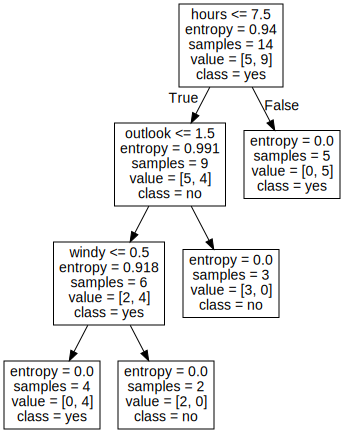

In [14]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [15]:
predict_result = decision_tree.predict(x_data)

print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [19]:
#test3
#시간을 PM/AM과 hours로만 받음(분/초는 생략)

file_path = "${PlayTennis3.csv 파일 경로}"
datas = pd.read_csv(file_path)
print(datas)

     outlook  temp humidity  windy  day time  hours play
0      sunny   hot     high  False  Mon   PM     14   no
1      sunny   hot     high   True  Sun   AM      4   no
2   overcast   hot     high  False  Thu   PM     20   no
3      rainy  mild     high  False  Fri   PM     12  yes
4      sunny  cool   normal  False  Sat   AM     10  yes
5      rainy  cool   normal   True  Sun   AM     11   no
6   overcast  cool   normal   True  Wed   PM     19  yes
7   overcast  mild     high  False  Tue   AM      6   no
8      sunny  cool   normal  False  Fri   PM     18  yes
9      rainy  mild   normal  False  Sat   AM      9  yes
10     sunny  mild   normal   True  Mon   PM     21   no
11     rainy  mild     high   True  Tue   PM     20  yes
12  overcast   hot   normal  False  Thu   AM      7  yes
13     rainy  mild     high   True  Fri   PM     15  yes


In [20]:
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['hours'] = label_encoder.fit_transform(datas['hours'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  hours  play
0         2     1         0      0    1     1      7     0
1         2     1         0      1    3     0      0     0
2         0     1         0      0    4     1     11     0
3         1     2         0      0    0     1      6     1
4         2     0         1      0    2     0      4     1
5         1     0         1      1    3     0      5     0
6         0     0         1      1    6     1     10     1
7         0     2         0      0    5     0      1     0
8         2     0         1      0    0     1      9     1
9         1     2         1      0    2     0      3     1
10        2     2         1      1    1     1     12     0
11        1     2         0      1    5     1     11     1
12        0     1         1      0    4     0      2     1
13        1     2         0      1    0     1      8     1


In [21]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time  hours
0         2     1         0      0    1     1      7
1         2     1         0      1    3     0      0
2         0     1         0      0    4     1     11
3         1     2         0      0    0     1      6
4         2     0         1      0    2     0      4
5         1     0         1      1    3     0      5
6         0     0         1      1    6     1     10
7         0     2         0      0    5     0      1
8         2     0         1      0    0     1      9
9         1     2         1      0    2     0      3
10        2     2         1      1    1     1     12
11        1     2         0      1    5     1     11
12        0     1         1      0    4     0      2
13        1     2         0      1    0     1      8

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    1
13    1
Name: play, dtype: int64


In [22]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

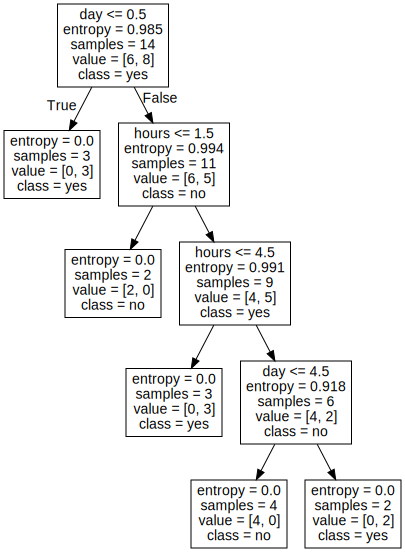

In [23]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [24]:
predict_result = decision_tree.predict(x_data)

print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [25]:
#test4
#요일에 PM/AM까지 붙여서 분류

file_path = "${PlayTennis4.csv 파일 경로}"
datas = pd.read_csv(file_path)
print(datas)

     outlook  temp humidity  windy     day  time play
0      sunny   hot     high  False  Mon-PM    14   no
1      sunny   hot   normal   True  Sun-PM    16   no
2   overcast   hot     high   True  Thu-AM     4   no
3      rainy  mild   normal  False  Fri-PM    12  yes
4      rainy  cool     high  False  Sat-AM    10  yes
5      rainy  cool     high  False  Sun-AM    11   no
6   overcast  cool   normal   True  Wed-PM    19  yes
7      sunny  mild     high   True  Tue-PM    18   no
8      sunny  cool   normal  False  Fri-AM     7  yes
9      rainy  mild   normal  False  Sat-AM     9  yes
10     sunny  mild   normal   True  Mon-PM    21  yes
11  overcast  mild     high   True  Tue-PM    20  yes
12  overcast   hot   normal  False  Thu-AM     6   no
13     rainy  mild     high   True  Fri-PM    15   no


In [26]:
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    2     7     0
1         2     1         1      1    5     9     0
2         0     1         0      1    6     0     0
3         1     2         1      0    1     6     1
4         1     0         0      0    3     4     1
5         1     0         0      0    4     5     0
6         0     0         1      1    8    11     1
7         2     2         0      1    7    10     0
8         2     0         1      0    0     2     1
9         1     2         1      0    3     3     1
10        2     2         1      1    2    13     1
11        0     2         0      1    7    12     1
12        0     1         1      0    6     1     0
13        1     2         0      1    1     8     0


In [27]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    2     7
1         2     1         1      1    5     9
2         0     1         0      1    6     0
3         1     2         1      0    1     6
4         1     0         0      0    3     4
5         1     0         0      0    4     5
6         0     0         1      1    8    11
7         2     2         0      1    7    10
8         2     0         1      0    0     2
9         1     2         1      0    3     3
10        2     2         1      1    2    13
11        0     2         0      1    7    12
12        0     1         1      0    6     1
13        1     2         0      1    1     8

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    0
Name: play, dtype: int64


In [28]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

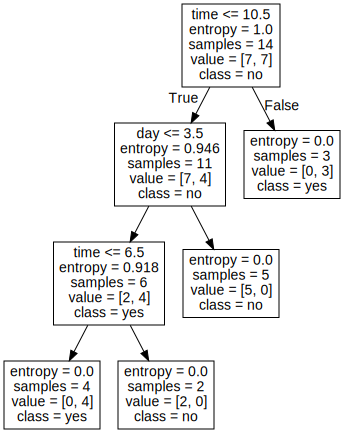

In [29]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [30]:
#test5
#요일과 시간을 합쳐서 작성

file_path = "${PlayTennis5.csv 파일 경로}"
datas = pd.read_csv(file_path)
print(datas)

     outlook  temp humidity  windy day-time play
0      sunny   hot     high  False   Mon-13   no
1      sunny   hot   normal   True   Sun-17  yes
2   overcast   hot     high   True    Thu-4   no
3      rainy  mild   normal  False   Fri-11  yes
4      rainy  cool     high  False   Sat-10  yes
5      rainy  cool     high  False    Sun-8   no
6   overcast  cool   normal   True   Wed-19  yes
7      sunny  mild     high   True   Tue-21   no
8      sunny  cool   normal  False   Fri-15  yes
9      rainy  mild   normal  False   Sat-13   no
10     sunny  mild   normal   True    Mon-9  yes
11  overcast  mild     high   True   Tue-20   no
12  overcast   hot   normal  False   Thu-14  yes
13     rainy  mild     high   True    Fri-6  yes


In [31]:
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day-time'] = label_encoder.fit_transform(datas['day-time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day-time  play
0         2     1         0      0         3     0
1         2     1         1      1         7     1
2         0     1         0      1        10     0
3         1     2         1      0         0     1
4         1     0         0      0         5     1
5         1     0         0      0         8     0
6         0     0         1      1        13     1
7         2     2         0      1        12     0
8         2     0         1      0         1     1
9         1     2         1      0         6     0
10        2     2         1      1         4     1
11        0     2         0      1        11     0
12        0     1         1      0         9     1
13        1     2         0      1         2     1


In [32]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day-time
0         2     1         0      0         3
1         2     1         1      1         7
2         0     1         0      1        10
3         1     2         1      0         0
4         1     0         0      0         5
5         1     0         0      0         8
6         0     0         1      1        13
7         2     2         0      1        12
8         2     0         1      0         1
9         1     2         1      0         6
10        2     2         1      1         4
11        0     2         0      1        11
12        0     1         1      0         9
13        1     2         0      1         2

0     0
1     1
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    1
Name: play, dtype: int64


In [33]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

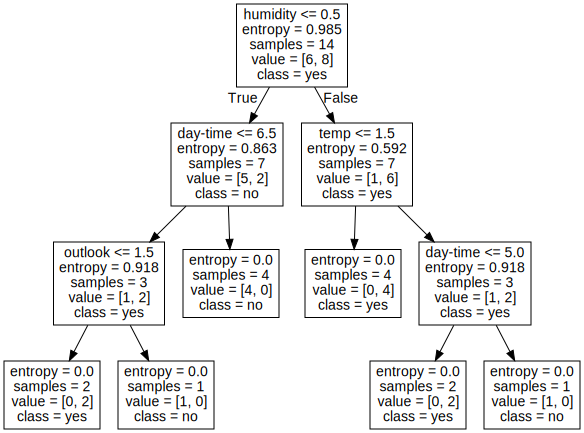

In [34]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [35]:
predict_result = decision_tree.predict(x_data)

print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [36]:
#test6
#요일-시간을 합쳐서 작성
#시간은 3시간씩 끊어서 분류 (24시간을 3시간씩 나눠서 1부터 8로 분류)

file_path = "${PlayTennis6.csv 파일 경로}"
datas = pd.read_csv(file_path)
print(datas)

     outlook  temp humidity  windy day-time play
0      sunny   hot     high  False    Mon-4   no
1      sunny   hot   normal   True    Sun-5  yes
2   overcast   hot     high   True    Thu-2   no
3      rainy  mild   normal  False    Fri-3  yes
4      rainy  cool     high  False    Sat-4  yes
5      rainy  cool     high  False    Sun-6   no
6   overcast  cool   normal   True    Wed-7  yes
7      sunny  mild     high   True    Tue-8   no
8      sunny  cool   normal  False    Fri-5  yes
9      rainy  mild   normal  False    Sat-4   no
10     sunny  mild   normal   True    Mon-2  yes
11  overcast  mild     high   True    Tue-6   no
12  overcast   hot   normal  False    Thu-7  yes
13     rainy  mild     high   True    Fri-3  yes


In [37]:
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day-time'] = label_encoder.fit_transform(datas['day-time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day-time  play
0         2     1         0      0         3     0
1         2     1         1      1         5     1
2         0     1         0      1         7     0
3         1     2         1      0         0     1
4         1     0         0      0         4     1
5         1     0         0      0         6     0
6         0     0         1      1        11     1
7         2     2         0      1        10     0
8         2     0         1      0         1     1
9         1     2         1      0         4     0
10        2     2         1      1         2     1
11        0     2         0      1         9     0
12        0     1         1      0         8     1
13        1     2         0      1         0     1


In [38]:
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day-time
0         2     1         0      0         3
1         2     1         1      1         5
2         0     1         0      1         7
3         1     2         1      0         0
4         1     0         0      0         4
5         1     0         0      0         6
6         0     0         1      1        11
7         2     2         0      1        10
8         2     0         1      0         1
9         1     2         1      0         4
10        2     2         1      1         2
11        0     2         0      1         9
12        0     1         1      0         8
13        1     2         0      1         0

0     0
1     1
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    1
Name: play, dtype: int64


In [39]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

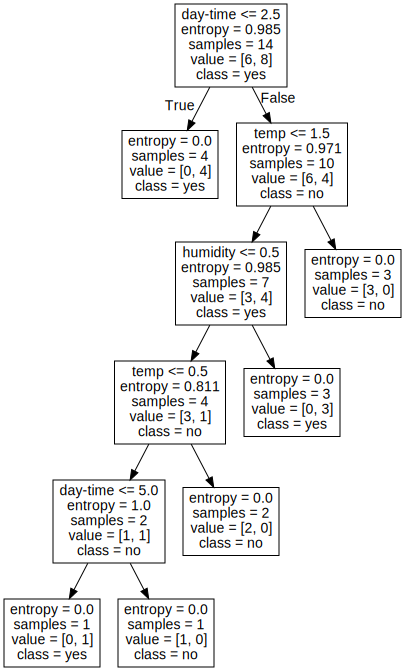

In [40]:
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph